# World Wide Products Inc.

### product demand forecasting - Project 4

#### Submitted by: Mugdha Bajjuri

The dataset contains historical product demand for a manufacturing company with footprints globally. The company provides thousands of products within dozens of product categories. There are four central warehouses to ship products within the region it is responsible for.

This dataset contains 1 CSV file.

Product_demand.csv - CSV data file containing product demand for encoded product id's

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
df = pd.read_csv('../data/raw/product_demand.csv')

In [3]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [4]:
#Removing Extra characters and converting order demand to float datatype

In [5]:
df['Order_Demand'] = df['Order_Demand'].replace( '[()]','', regex=True ).astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
Product_Code        1048575 non-null object
Warehouse           1048575 non-null object
Product_Category    1048575 non-null object
Date                1037336 non-null object
Order_Demand        1048575 non-null float64
dtypes: float64(1), object(4)
memory usage: 40.0+ MB


In [7]:
#checking for any null values
print(pd.isnull(df).sum())

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64


In [8]:
#Dropping the rows without date values, as we cant forecast with the null date values
df = df.dropna()
print(pd.isnull(df).sum())

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64


In [9]:
df.shape

(1037336, 5)

In [10]:
#Lets find the products with highest demand

In [11]:
prod = df.groupby('Product_Code')['Order_Demand'].sum().reset_index(name='Order_Demand')

In [12]:
prod.head()

,Product_Code,Order_Demand
0,Product_0001,460000.0
1,Product_0002,8836000.0
2,Product_0003,118300.0
3,Product_0004,124600.0
4,Product_0005,22300.0


In [13]:
prod = prod.sort_values('Order_Demand', ascending = False)

In [14]:
prod = prod.head(15)

### Plot showing products with highest demand

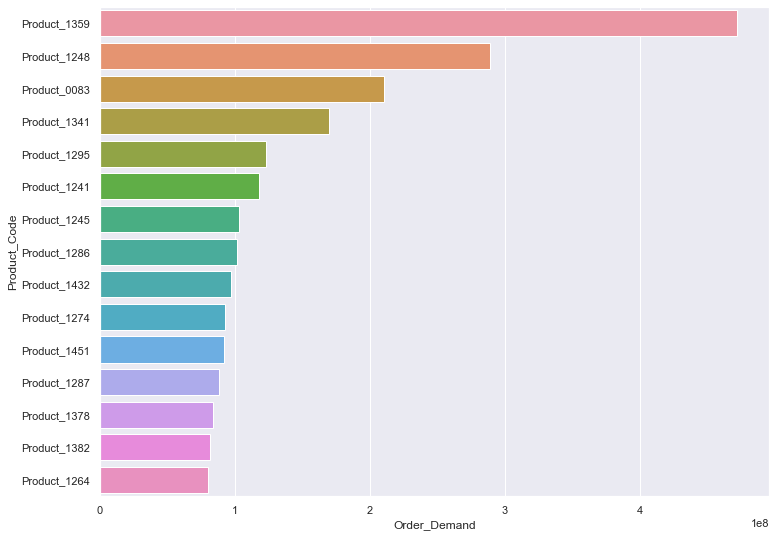

In [15]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.barplot(x="Order_Demand", y="Product_Code", data=prod, clip_on=True)

Product 1359 is with highest demand 

In [16]:
print(df['Date'].min())
print(df['Date'].max())

2011/1/8
2017/1/9


Products data is from 2011 till 2017

In [17]:
#Changing datatype for date column
import dateutil
df['Date'] = df['Date'].apply(dateutil.parser.parse)

In [18]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand               float64
dtype: object

In [19]:
# Extracting date features
df['date'] = df.Date.dt.day
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,date,month,year
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,27,7,2012
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,19,1,2012
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,3,2,2012
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,9,2,2012
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,2,3,2012


In [20]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand               float64
date                         int64
month                        int64
year                         int64
dtype: object

In [21]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,date,month,year
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,27,7,2012
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,19,1,2012
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,3,2,2012
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,9,2,2012
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,2,3,2012


In [22]:
df3 = df.groupby('year')['Order_Demand'].mean().reset_index(name='avg_order_demand')

In [23]:
df3.head()

,year,avg_order_demand
0,2011,13068.584375
1,2012,4661.575815
2,2013,4645.429285
3,2014,4949.900958
4,2015,5243.695256


### Plot of order demand over the years

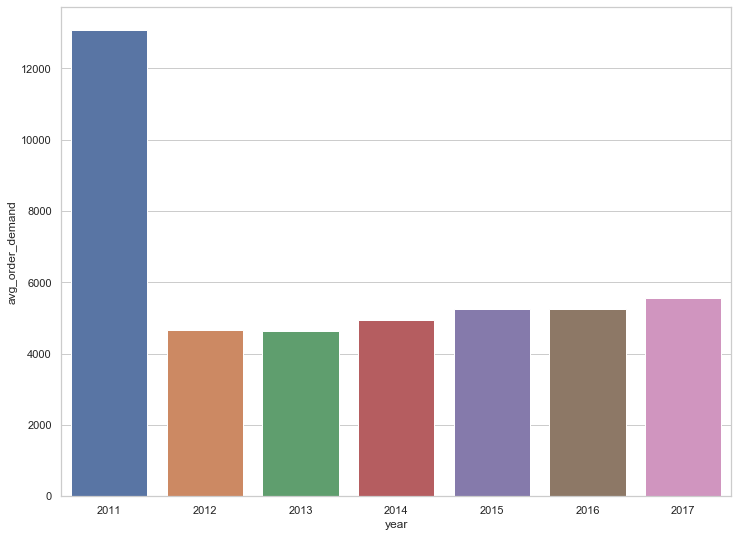

In [24]:
sns.set(style="whitegrid")
ax = sns.barplot(x="year", y="avg_order_demand", data=df3)

In [25]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,date,month,year
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,27,7,2012
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,19,1,2012
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,3,2,2012
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,9,2,2012
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,2,3,2012


In [26]:
dfprod1359 = df.loc[df['Product_Code'] == 'Product_1359'].sort_values(['Date'],ascending=False)

In [27]:
dfprod1359.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,date,month,year
921328,Product_1359,Whse_J,Category_019,2017-01-06,100000.0,6,1,2017
943424,Product_1359,Whse_J,Category_019,2016-12-28,50000.0,28,12,2016
870423,Product_1359,Whse_J,Category_019,2016-12-28,3000.0,28,12,2016
877287,Product_1359,Whse_J,Category_019,2016-12-28,3000.0,28,12,2016
871104,Product_1359,Whse_J,Category_019,2016-12-28,10000.0,28,12,2016


In [28]:
dfprod1359 = dfprod1359.drop(columns=['Product_Code','Product_Category','date','month','year'])
dfprod1359.index=pd.to_datetime(dfprod1359.Date,format='%Y/%m/%d')
dfprod1359.drop(columns=['Date'],inplace=True)

In [29]:
dfprod1359.tail()

,Warehouse,Order_Demand
Date,,
2012-01-05,Whse_J,150000.0
2012-01-05,Whse_J,25000.0
2012-01-05,Whse_J,5000.0
2012-01-05,Whse_J,5000.0
2012-01-05,Whse_J,1000.0


In [30]:
#resampling dfprod1359 with Month

prod1359DmndMnth = dfprod1359.resample('M').sum()
prod1359DmndMnth.tail(10)

,Order_Demand
Date,
2016-04-30,6341000.0
2016-05-31,6854000.0
2016-06-30,7870000.0
2016-07-31,7108000.0
2016-08-31,6934000.0
2016-09-30,6960000.0
2016-10-31,7727000.0
2016-11-30,8814000.0
2016-12-31,5653000.0


#### Product 1359 demand over the years

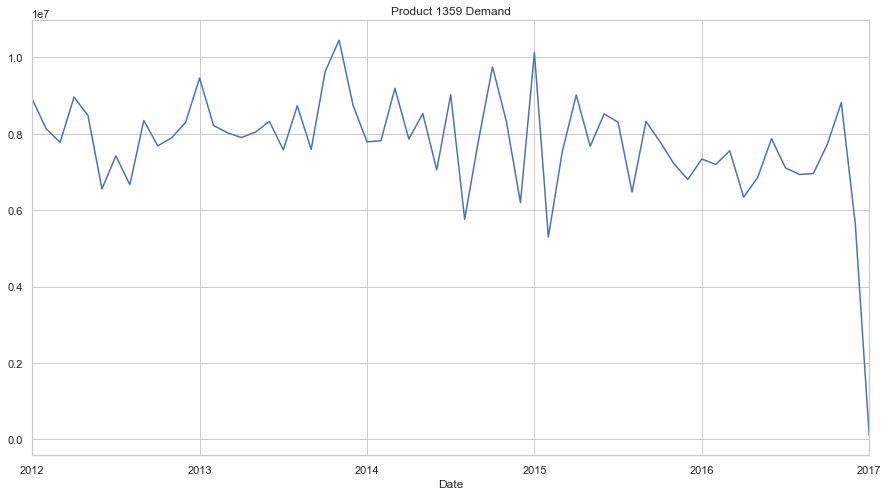

In [31]:
prod1359DmndMnth.Order_Demand.plot(figsize=(15,8), title= 'Product 1359 Demand')
plt.show()

## Forecasting Models

### FbProphet Model

In [32]:
#Using FbProphet model for forecasting demand
from fbprophet import Prophet

In [33]:
df_group2 = df[df['Product_Code'] == 'Product_1359']
df_group2 = df_group2.drop(['Warehouse','Product_Category','date','year','Product_Code','month'],1)

In [34]:
df_group2 = df_group2.rename(columns = {'Date': 'ds', 'Order_Demand': 'y' })

In [35]:
obj = Prophet(daily_seasonality=True)
obj.fit(df_group2)

In [36]:
future = obj.make_future_dataframe(periods=365)

In [37]:
forecast = obj.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
17296,2018-01-02,34329.331077,-61794.799028,122157.062064
17297,2018-01-03,30927.000131,-63116.269280,118976.464877
17298,2018-01-04,27621.133290,-51593.634050,113113.823413
17299,2018-01-05,28651.694584,-56649.060327,123186.586049
17300,2018-01-06,5381.198094,-76411.589302,99183.048864


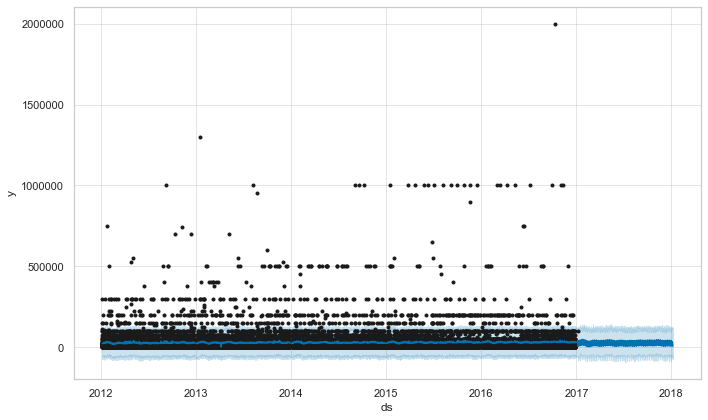

In [38]:
fig1 = obj.plot(forecast)

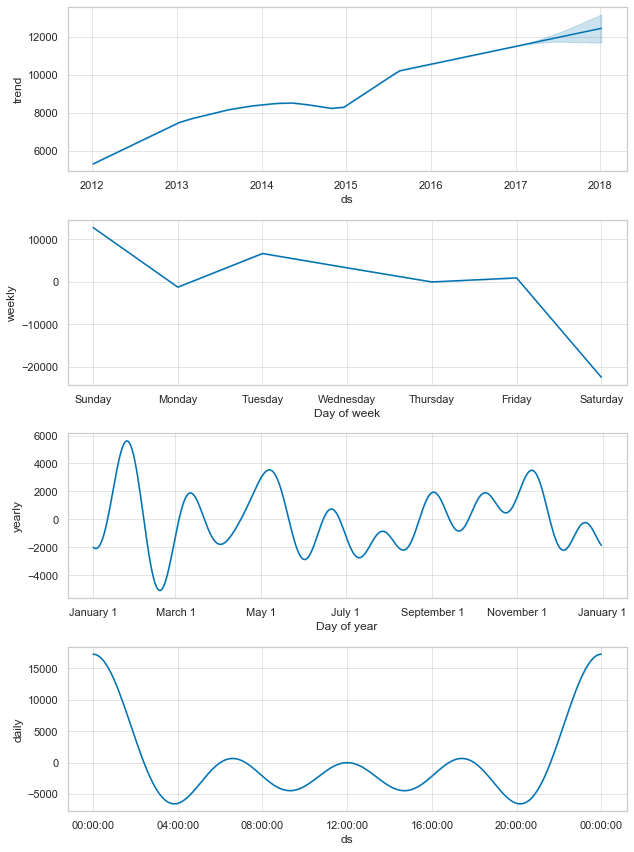

In [39]:
fig2 = obj.plot_components(forecast)

### Observations :

Looking at the various forecasting plots derived from fbProphet model, for Product_1359 
following observations can be made:

Demand for the product_1359 is increasing from 2012 to 2018 with a small dip from 2014 to 2015.

Considering yearly trend, there is a sharp increase in demand between January to March

Considering weekly trend, demand is high on sundays and then goes to negative on saturdays
    

# ARIMA Model

SARIMAX,  is used to model and predict future points of a time series.

ARIMA component is used to fit time-series data to better understand and forecast future points in the time series.

In [40]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(prod1359DmndMnth,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2859      0.389     -0.736      0.462      -1.048       0.476
ma.L1         -0.7501      0.166     -4.524      0.000      -1.075      -0.425
ar.S.L12      -0.2269      0.235     -0.967      0.333      -0.687       0.233
sigma2      3.771e+12   4.25e-14   8.86e+25      0.000    3.77e+12    3.77e+12


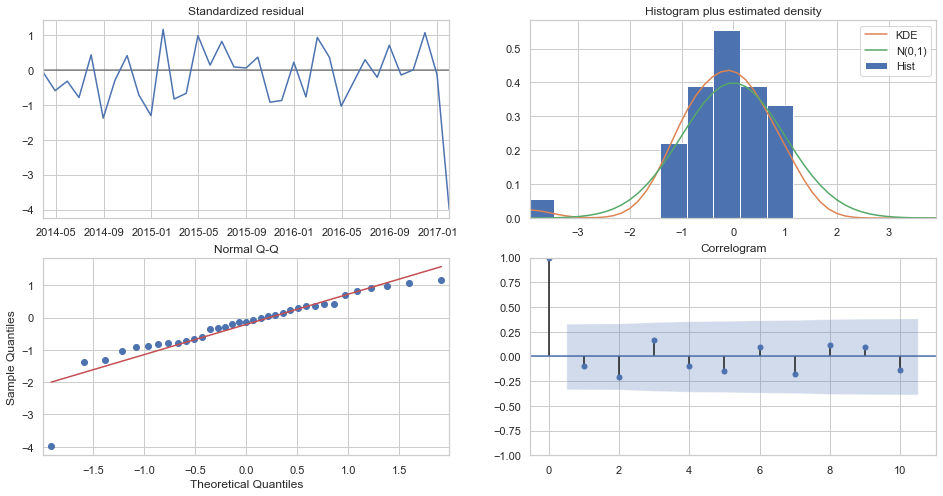

In [41]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [42]:
pd.plotting.register_matplotlib_converters()

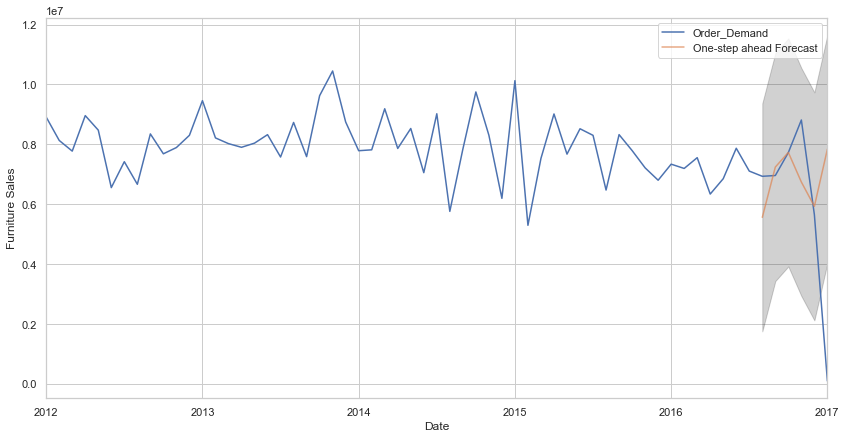

In [43]:
pred = results.get_prediction(start=pd.to_datetime('2016-08-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = prod1359DmndMnth['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()